In [1]:
import sys 
import os
sys.path.append('../')

from src.stock_predictor.data_pipeline import StockDataPipeline
import pandas as pd
import matplotlib.pyplot as plt

print("Successful imports!")

Successful imports!


In [2]:
try:
    pipeline = StockDataPipeline("../config/config.yaml")
    print("Pipeline initialized successfully")
    print(f"Raw data path: {pipeline.raw_data_path}")
    print(f"Processed data path: {pipeline.processed_data_path}")
except Exception as e:
    print(f"Pipeline initialization failed: {e}")

2025-08-14 21:38:57,324 - src.stock_predictor.data_pipeline - INFO - StockDataPipeline initialized successfully
2025-08-14 21:38:57,325 - src.stock_predictor.data_pipeline - INFO - Alpha Vantage client initialized
2025-08-14 21:38:57,326 - src.stock_predictor.data_pipeline - INFO - API clients setup completed
2025-08-14 21:38:57,327 - src.stock_predictor.data_pipeline - INFO - Data directories created: ../data/raw, ../data/processed


Pipeline initialized successfully
Raw data path: ../data/raw
Processed data path: ../data/processed


In [3]:
try:
    symbol = "RELIANCE.NS"
    period = "3mo"
    
    print(f"Fetching data for {symbol}...")
    reliance_data =  pipeline.fetch_yahoo_data(symbol, period)
    
    # saved_path = pipeline.save_data(reliance_data, symbol, 'yahoo_finance')
    
    print(f"Successfully fetched {len(reliance_data)} records")
    print(f"Columns: {list(reliance_data.columns)}")
    print(f"Date range: {reliance_data['Datetime'].min()} to {reliance_data['Datetime'].max()}")
    print("\nFirst 3 rows:")
    print(reliance_data.head(3))
except Exception as e:
    print(f"Error fetching {symbol}: {e}")

2025-08-14 21:39:05,855 - src.stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for RELIANCE.NS with period 3mo
2025-08-14 21:39:05,856 - src.stock_predictor.data_pipeline - INFO - Attempt 1/3 for RELIANCE.NS


Fetching data for RELIANCE.NS...


2025-08-14 21:39:06,667 - src.stock_predictor.data_pipeline - INFO - Data validation passed
/home/oxy/repo/stock-market-prediction-test/notebooks/../src/stock_predictor/data_pipeline.py:188: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = cleaned_data.fillna(method='ffill')
2025-08-14 21:39:06,672 - src.stock_predictor.data_pipeline - INFO - Converted timestamps to IST for RELIANCE.NS
2025-08-14 21:39:06,673 - src.stock_predictor.data_pipeline - INFO - Data cleaned successfully for RELIANCE.NS
2025-08-14 21:39:06,673 - src.stock_predictor.data_pipeline - INFO - Successfully fetched 67 records for RELIANCE.NS


Successfully fetched 67 records
Columns: ['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Symbol', 'Source', 'Exchange', 'Currency']
Date range: 2025-05-14 00:00:00+05:30 to 2025-08-14 00:00:00+05:30

First 3 rows:
                   Datetime     Open     High      Low    Close    Volume  \
0 2025-05-14 00:00:00+05:30  1414.35  1424.21  1409.87  1418.73   5570160   
1 2025-05-15 00:00:00+05:30  1419.33  1455.59  1407.08  1448.42  20177211   
2 2025-05-16 00:00:00+05:30  1447.42  1455.19  1441.54  1450.61   9036695   

   Dividends  Stock Splits       Symbol         Source Exchange Currency  
0        0.0           0.0  RELIANCE.NS  yahoo_finance      NSE      INR  
1        0.0           0.0  RELIANCE.NS  yahoo_finance      NSE      INR  
2        0.0           0.0  RELIANCE.NS  yahoo_finance      NSE      INR  


In [4]:
indian_stocks = [
    "RELIANCE.NS",
    "TCS.NS",
    "INFY.NS",
    "HDFCBANK.NS",
    "^NSEI"
]
saved_files = pipeline.save_data(reliance_data, "RELIANCE.NS", "yahoo_finance")

results = {}
for symbol in indian_stocks:
    try:
        print(f"Testing {symbol}...")
        data = pipeline.fetch_yahoo_data(symbol, "1mo")
        results[symbol] = {
            'records': len(data),
            'exchange': data['Exchange'].iloc[0],
            'currency': data['Currency'].iloc[0],
            'latest_close': data['Close'].iloc[-1]
        }
        print(f"{symbol}: {len(data)} records, Latest Close: Rs.{data['Close'].iloc[-1]:.2f}")
    except Exception as e:
        print(f"{symbol} failed: {e}")
        results[symbol] = {'error': str(e)}
    print(f"\nSummary: {len([k for k, v in results.items() if 'error' not in v])}/{len(indian_stocks)} stocks successful")

2025-08-14 21:39:17,447 - src.stock_predictor.data_pipeline - INFO - Data saved successfully: ../data/raw/yahoo_finance/RELIANCE_20250814_213917.parquet
2025-08-14 21:39:17,448 - src.stock_predictor.data_pipeline - INFO - Saved 67 records for RELIANCE.NS
2025-08-14 21:39:17,449 - src.stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for RELIANCE.NS with period 1mo
2025-08-14 21:39:17,450 - src.stock_predictor.data_pipeline - INFO - Attempt 1/3 for RELIANCE.NS


2025-08-14 21:39:17,610 - src.stock_predictor.data_pipeline - INFO - Data validation passed
/home/oxy/repo/stock-market-prediction-test/notebooks/../src/stock_predictor/data_pipeline.py:188: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = cleaned_data.fillna(method='ffill')
2025-08-14 21:39:17,614 - src.stock_predictor.data_pipeline - INFO - Converted timestamps to IST for RELIANCE.NS
2025-08-14 21:39:17,615 - src.stock_predictor.data_pipeline - INFO - Data cleaned successfully for RELIANCE.NS
2025-08-14 21:39:17,615 - src.stock_predictor.data_pipeline - INFO - Successfully fetched 24 records for RELIANCE.NS
2025-08-14 21:39:17,617 - src.stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for TCS.NS with period 1mo
2025-08-14 21:39:17,618 - src.stock_predictor.data_pipeline - INFO - Attempt 1/3 for TCS.NS


Testing RELIANCE.NS...
RELIANCE.NS: 24 records, Latest Close: Rs.1373.80

Summary: 1/5 stocks successful
Testing TCS.NS...


2025-08-14 21:39:17,856 - src.stock_predictor.data_pipeline - INFO - Data validation passed
/home/oxy/repo/stock-market-prediction-test/notebooks/../src/stock_predictor/data_pipeline.py:188: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = cleaned_data.fillna(method='ffill')
2025-08-14 21:39:17,861 - src.stock_predictor.data_pipeline - INFO - Converted timestamps to IST for TCS.NS
2025-08-14 21:39:17,862 - src.stock_predictor.data_pipeline - INFO - Data cleaned successfully for TCS.NS
2025-08-14 21:39:17,863 - src.stock_predictor.data_pipeline - INFO - Successfully fetched 24 records for TCS.NS
2025-08-14 21:39:17,864 - src.stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for INFY.NS with period 1mo
2025-08-14 21:39:17,865 - src.stock_predictor.data_pipeline - INFO - Attempt 1/3 for INFY.NS


TCS.NS: 24 records, Latest Close: Rs.3022.30

Summary: 2/5 stocks successful
Testing INFY.NS...


2025-08-14 21:39:18,119 - src.stock_predictor.data_pipeline - INFO - Data validation passed
/home/oxy/repo/stock-market-prediction-test/notebooks/../src/stock_predictor/data_pipeline.py:188: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = cleaned_data.fillna(method='ffill')
2025-08-14 21:39:18,124 - src.stock_predictor.data_pipeline - INFO - Converted timestamps to IST for INFY.NS
2025-08-14 21:39:18,124 - src.stock_predictor.data_pipeline - INFO - Data cleaned successfully for INFY.NS
2025-08-14 21:39:18,125 - src.stock_predictor.data_pipeline - INFO - Successfully fetched 24 records for INFY.NS
2025-08-14 21:39:18,126 - src.stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for HDFCBANK.NS with period 1mo
2025-08-14 21:39:18,127 - src.stock_predictor.data_pipeline - INFO - Attempt 1/3 for HDFCBANK.NS


INFY.NS: 24 records, Latest Close: Rs.1447.70

Summary: 3/5 stocks successful
Testing HDFCBANK.NS...


2025-08-14 21:39:18,370 - src.stock_predictor.data_pipeline - INFO - Data validation passed
/home/oxy/repo/stock-market-prediction-test/notebooks/../src/stock_predictor/data_pipeline.py:188: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = cleaned_data.fillna(method='ffill')
2025-08-14 21:39:18,374 - src.stock_predictor.data_pipeline - INFO - Converted timestamps to IST for HDFCBANK.NS
2025-08-14 21:39:18,375 - src.stock_predictor.data_pipeline - INFO - Data cleaned successfully for HDFCBANK.NS
2025-08-14 21:39:18,375 - src.stock_predictor.data_pipeline - INFO - Successfully fetched 24 records for HDFCBANK.NS
2025-08-14 21:39:18,376 - src.stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for ^NSEI with period 1mo
2025-08-14 21:39:18,377 - src.stock_predictor.data_pipeline - INFO - Attempt 1/3 for ^NSEI


HDFCBANK.NS: 24 records, Latest Close: Rs.1991.10

Summary: 4/5 stocks successful
Testing ^NSEI...


2025-08-14 21:39:18,589 - src.stock_predictor.data_pipeline - INFO - Data validation passed
/home/oxy/repo/stock-market-prediction-test/notebooks/../src/stock_predictor/data_pipeline.py:188: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = cleaned_data.fillna(method='ffill')
2025-08-14 21:39:18,593 - src.stock_predictor.data_pipeline - INFO - Converted timestamps to IST for ^NSEI
2025-08-14 21:39:18,594 - src.stock_predictor.data_pipeline - INFO - Data cleaned successfully for ^NSEI
2025-08-14 21:39:18,594 - src.stock_predictor.data_pipeline - INFO - Successfully fetched 24 records for ^NSEI


^NSEI: 24 records, Latest Close: Rs.24631.30

Summary: 5/5 stocks successful


2025-08-14 21:27:00,343 - src.stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for RELIANCE.NS with period 3mo
2025-08-14 21:27:00,345 - src.stock_predictor.data_pipeline - INFO - Attempt 1/3 for RELIANCE.NS
2025-08-14 21:27:00,634 - src.stock_predictor.data_pipeline - INFO - Data validation passed
/home/oxy/repo/stock-market-prediction-test/notebooks/../src/stock_predictor/data_pipeline.py:188: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cleaned_data = cleaned_data.fillna(method='ffill')
2025-08-14 21:27:00,638 - src.stock_predictor.data_pipeline - INFO - Converted timestamps to IST for RELIANCE.NS
2025-08-14 21:27:00,640 - src.stock_predictor.data_pipeline - INFO - Data cleaned successfully for RELIANCE.NS
2025-08-14 21:27:00,640 - src.stock_predictor.data_pipeline - INFO - Successfully fetched 67 records for RELIANCE.NS


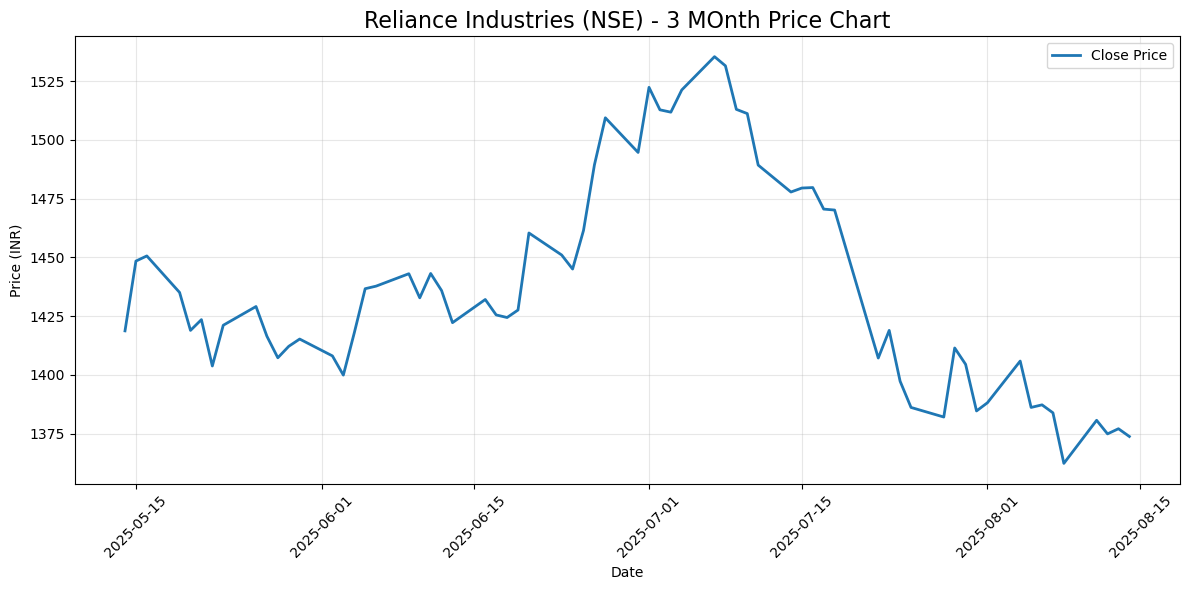

Price Range: Rs. 1362.36 - Rs. 1535.37
Average Volume: 10,189,635 shares


In [5]:
try:
    if 'RELIANCE.NS' in results and 'error' not in results['RELIANCE.NS']:
        reliance_data = pipeline.fetch_yahoo_data("RELIANCE.NS", "3mo")
        plt.figure(figsize=(12, 6))
        plt.plot(reliance_data['Datetime'], reliance_data['Close'], label='Close Price', linewidth=2)
        plt.title('Reliance Industries (NSE) - 3 MOnth Price Chart', fontsize=16)
        plt.xlabel('Date')
        plt.ylabel('Price (INR)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        print(f"Price Range: Rs. {reliance_data['Close'].min():.2f} - Rs. {reliance_data['Close'].max():.2f}")
        print(f"Average Volume: {reliance_data['Volume'].mean():,.0f} shares")
except Exception as e:
    print(f"Visualization error: {e}")

In [6]:
# Cell 6: Data Quality Checks
def analyze_data_quality(df, symbol):
    """Analyze data quality for a stock dataset."""
    print(f"\n🔍 Data Quality Analysis for {symbol}")
    print(f"Total records: {len(df)}")
    print(f"Date range: {df['Datetime'].min().date()} to {df['Datetime'].max().date()}")
    
    # Check for missing values
    missing_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].isnull().sum()
    print(f"Missing values: {missing_data.sum()}")
    
    # Check price consistency
    price_issues = (df['High'] < df['Low']).sum()
    print(f"Price logic issues (High < Low): {price_issues}")
    
    # Volume analysis
    zero_volume_days = (df['Volume'] == 0).sum()
    print(f"Zero volume days: {zero_volume_days}")
    
    # Basic statistics
    print(f"Average Close Price: ₹{df['Close'].mean():.2f}")
    print(f"Price Volatility (std): ₹{df['Close'].std():.2f}")

# Test data quality
if 'reliance_data' in locals():
    analyze_data_quality(reliance_data, "RELIANCE.NS")



🔍 Data Quality Analysis for RELIANCE.NS
Total records: 67
Date range: 2025-05-14 to 2025-08-14
Missing values: 0
Price logic issues (High < Low): 0
Zero volume days: 0
Average Close Price: ₹1436.71
Price Volatility (std): ₹44.59


In [7]:
# Cell 7: Test Error Handling
print("🧪 Testing Error Handling...")

# Test invalid symbol
try:
    invalid_data = pipeline.fetch_yahoo_data("INVALID_SYMBOL", "1mo")
except Exception as e:
    print(f"✅ Invalid symbol error handled: {str(e)[:100]}...")

# Test invalid period
try:
    invalid_period = pipeline.fetch_yahoo_data("RELIANCE.NS", "invalid_period")
except Exception as e:
    print(f"✅ Invalid period error handled: {str(e)[:100]}...")

# Test non-Indian symbol format
try:
    non_indian = pipeline.fetch_yahoo_data("AAPL", "1mo")  # US stock without .NS/.BO
except Exception as e:
    print(f"✅ Non-Indian symbol error handled: {str(e)[:100]}...")

print("✅ Error handling tests completed!")


2025-08-14 21:27:09,705 - src.stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for INVALID_SYMBOL with period 1mo
2025-08-14 21:27:09,707 - src.stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for RELIANCE.NS with period invalid_period
2025-08-14 21:27:09,709 - src.stock_predictor.data_pipeline - INFO - Fetching BSE/NSE data for AAPL with period 1mo


🧪 Testing Error Handling...
✅ Invalid symbol error handled: Invalid Indian stock symbol: INVALID_SYMBOL. Use .NS for NSE, .BO for BSE, or ^ for indices...
✅ Invalid period error handled: Invalid period: invalid_period. Valid periods: ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '...
✅ Non-Indian symbol error handled: Invalid Indian stock symbol: AAPL. Use .NS for NSE, .BO for BSE, or ^ for indices...
✅ Error handling tests completed!


In [1]:
import pandas as pd
try:
    engine = pd.io.parquet.get_engine('auto')
    print(f"✅ Parquet engine: {type(engine).__name__}")
except Exception as e:
    print(f"❌ No parquet engine available: {e}")


✅ Parquet engine: PyArrowImpl
